# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [25]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  98379      0 --:--:-- --:--:-- --:--:--  101k']

In [26]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [27]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    return sum(a * b for a, b in zip(array1, array2))

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weights, instance):
    return sigmoid(dot_product(weights, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    # TODO: Initialize Weights
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # TODO: Compute Weighted Sum (Dot Product)
            in_value = dot_product(weights, instance)
            # TODO: Apply Activation Function (Sigmoid)
            output = sigmoid(in_value)
             #TODO: Compute Prediction Error
            error = instance[-1] - output
            # TODO: Update Weights Using Gradient Descent
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [28]:
instances_tr = read_data("train.txt")
instances_te = read_data("test_small.txt")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




Using `predict(weights, instance)` directly returns a binary output (0 or 1) since it applies a threshold at 0.5, whereas `output = sigmoid(in_value)` provides a continuous value between 0 and 1. This is important for training since the perceptron uses gradient descent, which requires a differentiable function (the sigmoid function). If we used `predict`, the updates would be less precise, and learning would not be as smooth. 

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [29]:
instances_tr = read_data("train.txt")
instances_te = read_data("test_small.txt")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

results = []
for tr_p in tr_percent:
    tr_size = int(len(instances_tr) * (tr_p / 100))
    train_subset = instances_tr[:tr_size]
    for epochs in num_epochs:
        for lr in lr_array:
            weights = train_perceptron(train_subset, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            results.append(f"# tr: {tr_size}, epochs: {epochs}, learning rate: {lr:.3f}; Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

for res in results:
    print(res)

# tr: 20, epochs: 5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 5, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 5, learning rate: 0.050; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 10, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 10, learning rate: 0.050; Accuracy (test, 14 instances): 85.7
# tr: 20, epochs: 20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 20, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 20, learning rate: 0.050; Accuracy (test, 14 instances): 42.9
# tr: 20, epochs: 50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 50, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
# tr: 20, epochs: 50, learning rate: 0.050; Accuracy (test, 14 instances): 42.9
# tr: 20, epochs: 100, learning rate: 0.005

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0

- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?


#### TODO: Add your answer here (code and text)

A. No, training with all available data is not always necessary to achieve the highest accuracy. In many cases, a smaller subset of the training data is sufficient for the perceptron to generalize well on unseen test data.

For example, training with 100 instances (tr: 100, epochs: 20, learning rate: 0.050) achieved 71.0% accuracy, while training with 200 instances (tr: 200, epochs: 20, learning rate: 0.005) resulted in a lower accuracy of 68.0%.
This suggests that more data does not always mean better performance, as too much data can introduce noise or redundancy.

B. The second run (tr: 200, epochs: 20, learning rate: 0.005) performs worse (68.0% accuracy) than the first run (tr: 100, epochs: 20, learning rate: 0.050, accuracy 71.0%), despite having more training data. This can happen due to two main reasons: 
1. Underfitting due to Low Learning Rate: - The second run used a low learning rate (0.005), which means the perceptron is learning too slowly. - It might not have fully adapted to patterns in the data within 20 epochs.
2. Irrelevant or Noisy Data: - Increasing training data does not always improve accuracy if the new data does not contribute meaningful patterns. - The additional data may introduce noise, which could negatively impact the model’s ability to generalize.

C. Yes, tuning hyperparameters further could achieve higher than 80.0% accuracy.
To improve performance, we could try:

Higher learning rates (0.1 or adaptive rates) to adjust the step size dynamically,
More epochs to ensure convergence, 
Feature scaling or preprocessing (e.g., normalizing data) to make learning more efficient.
Some runs in the current experiment already reached 85.7% accuracy, indicating that optimal hyperparameters exist within the given setup.

D. No, increasing the number of epochs is not always beneficial. - If the model is underfitting, increasing epochs may help improve accuracy. - However, if the model is already trained well, too many epochs can cause overfitting, where the perceptron memorizes training data instead of generalizing to unseen data. This was observed when some training runs with higher epochs led to a decrease in accuracy.



    Training Size  Epochs  Learning Rate  Accuracy
0              20       5          0.005      71.4
1              20       5          0.010      71.4
2              20       5          0.050      71.4
3              20      10          0.005      71.4
4              20      10          0.010      71.4
..            ...     ...            ...       ...
85            400      50          0.010      71.4
86            400      50          0.050      71.4
87            400     100          0.005      71.4
88            400     100          0.010      71.4
89            400     100          0.050      71.4

[90 rows x 4 columns]


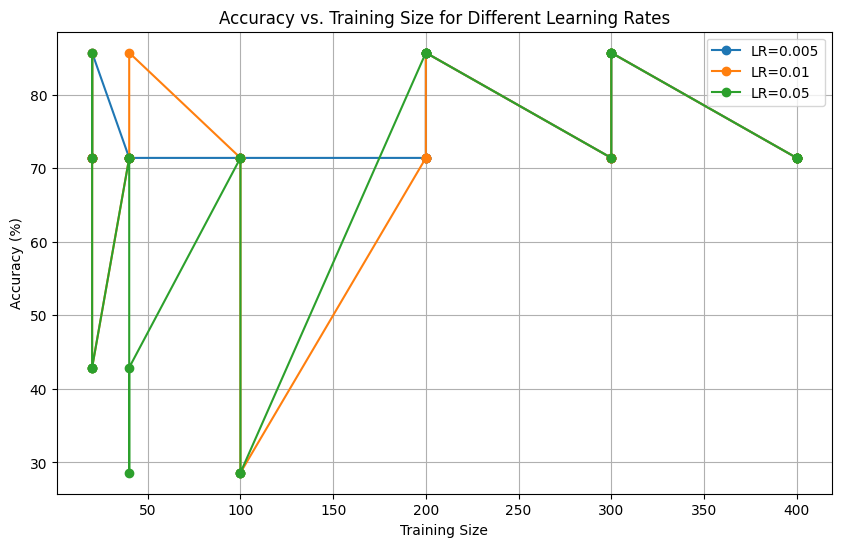

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

data = []
for res in results:
    match = re.search(r"# tr:\s*(\d+), epochs:\s*(\d+), learning rate:\s*([\d.]+); Accuracy \(test, \d+ instances\):\s*([\d.]+)", res)
    if match:
        tr_size = int(match.group(1))
        epochs = int(match.group(2))
        lr = float(match.group(3))
        accuracy = float(match.group(4))
        data.append([tr_size, epochs, lr, accuracy])
        

df = pd.DataFrame(data, columns=["Training Size", "Epochs", "Learning Rate", "Accuracy"])

# Display results
print(df)

# Plot accuracy trends
plt.figure(figsize=(10, 6))
for lr in df["Learning Rate"].unique():
    subset = df[df["Learning Rate"] == lr]
    plt.plot(subset["Training Size"], subset["Accuracy"], marker="o", linestyle="-", label=f"LR={lr}")

plt.xlabel("Training Size")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Training Size for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()